# Задача: 
Предсказать, кто из пассажиров титаника выживет, а кто умрет.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

from sklearn.model_selection import cross_val_score 

In [4]:
# Визуализация
from IPython.display import SVG, display, HTML
from graphviz import Source

style = "<style>svg{width: 10% !important; height: 10% !important;}</style>"
HTML(style)
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin" + os.pathsep + "C:\\Program Files\\Graphviz"

Загрузка данных

In [5]:
# Данные на которых модель будет обучаться
train_data = pd.read_csv('train.csv', index_col='PassengerId')
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Данные на котрых модель будет предсказывать
test_data = pd.read_csv('test.csv', index_col='PassengerId')
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Данные для проверки
y = pd.read_csv('gender_submission.csv', index_col='PassengerId')
y.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


# Подготавливаем данные

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
X_train = train_data.drop(['Name', 'Survived', 'Ticket', 'Cabin'], axis=1) # То на чем модель будет учится
y_train = train_data.Survived # То что модель будет предсказывать при обучении
X_test  = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1) # Данные для предсказания

In [59]:
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [9]:
X_train = pd.get_dummies(X_train) # Преобразование категориальных переменных в индикаторные переменные
X_train = X_train.fillna({'Age': X_train.Age.median()}) # Заполняем пропуски в возрасте серединным значением

In [10]:
X_test = pd.get_dummies(X_test) 
X_test= X_test.fillna({'Age': X_test.Age.median(),
                        'Fare': X_test.Fare.median()})
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Sex_female  418 non-null    uint8  
 6   Sex_male    418 non-null    uint8  
 7   Embarked_C  418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 21.6 KB


# Обучаем дерево решений
### Ищем наилучшие параметры для дерева решений

In [11]:
from sklearn.model_selection import GridSearchCV 

#tree_clf = tree.DecisionTreeClassifier() # Создаем дерево

In [63]:
parametrs = {'criterion':['gini', 'entropy'], 'max_depth': range(1, 30)} # Определяем возможные параметры 
grid_search_cv_clf = GridSearchCV(tree_clf, param_grid=parametrs, cv=5) # Находим подходящие параметры

Обучаем дерево

In [64]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [65]:
grid_search_cv_clf.best_params_ # Лучшие параметры для максимального accurecy в кросвалидации

{'criterion': 'gini', 'max_depth': 9}

In [66]:
best_clf = grid_search_cv_clf.best_estimator_ # Дерево с этими парраметрами

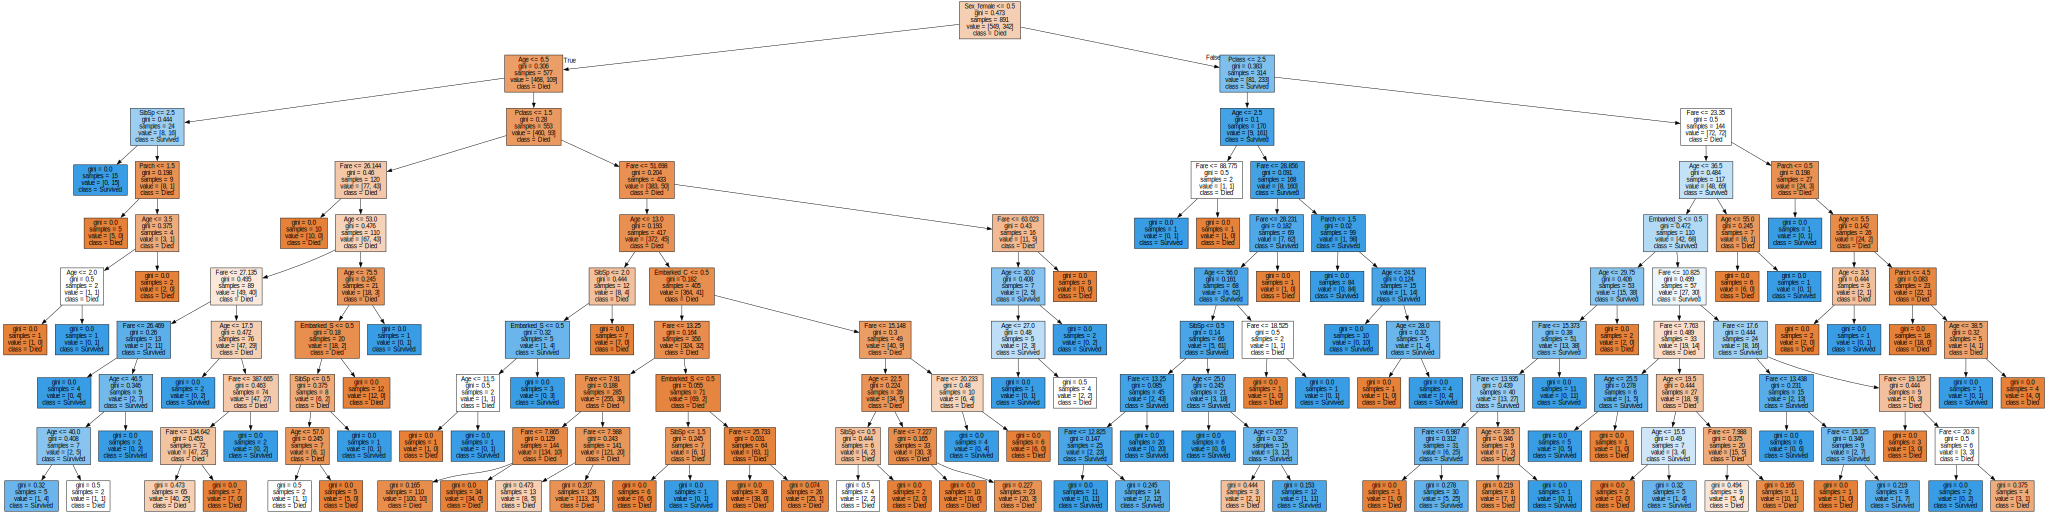

In [67]:
graph = Source(tree.export_graphviz(best_clf, out_file=None, feature_names=list(X_train), \
    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [68]:
predictions = best_clf.predict(X_test)

In [69]:
y_test = pd.DataFrame({'Survived': predictions}, index=X_test.index)
y_test.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [70]:
best_clf.score(X_test, y)

0.861244019138756

In [71]:
y_test.to_csv('submission_tree.csv')

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1


In [32]:
params = {
'criterion':['gini', 'entropy'],
'n_estimators':range(10,51,10),
'max_depth':range(1,13,2),
'min_samples_leaf':range(1,8),
'min_samples_split':range(2,10,2)   
}

In [33]:
fr = RandomForestClassifier(random_state=0) # Создаем лес

In [34]:
best_fr = GridSearchCV(fr, param_grid=params, cv=3, n_jobs=-1)

In [35]:
best_fr.fit(X_train, y_train) # Обучаем
forest_predictions = best_fr.predict(X_test) # Предсказываем

In [36]:
best_fr.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 20}

In [37]:
y_pred = pd.DataFrame({'Survived': forest_predictions}, index=X_test.index)

In [44]:
best_fr.score(X_test, y)

0.8899521531100478

График важности фичей

In [27]:
fr.fit(X_train, y_train)

RandomForestClassifier()

<AxesSubplot: >

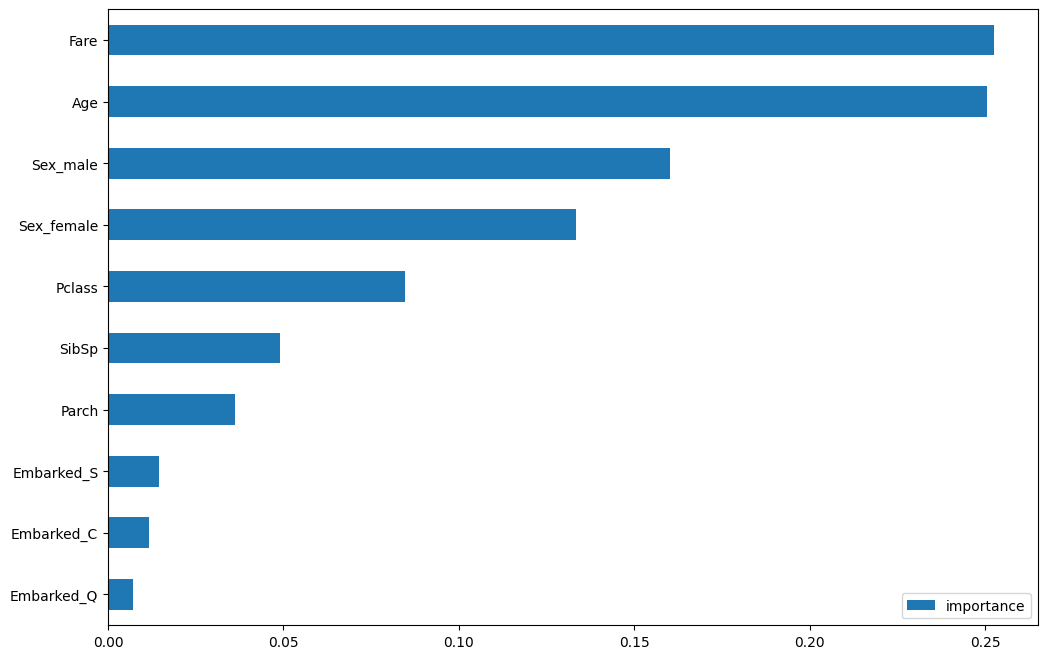

In [28]:
imp = pd.DataFrame(fr.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [40]:
y_pred.to_csv('submission_forest.csv')